# Gradient Descent
gradient descent 방법을 적용하여 다음 함수의 최저점을 구하여라.
    $$ f(x) = \frac{1}{2}x^4 -3 x^3 $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

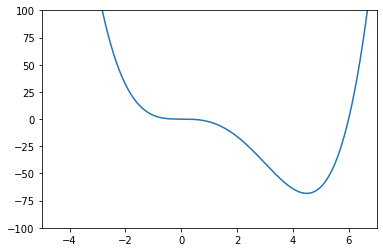

In [2]:
x = np.arange(-10,10,0.01)
def f(x):
    return 0.5*x**4 - 3*x**3
plt.ylim(-100,100)
plt.xlim(-5,7)
plt.plot(x,f(x))

In [3]:
min(f(x))

-68.34375

In [4]:
x = 6
x_dot = 2
eps = 0.01
precision = 0

#도함수(미분)
def fp(x):
    return 2*x**3-9*x**2

#경사하강법
while abs(x - x_dot)>precision:
    x_dot = x
    x = x_dot - eps*fp(x_dot)

print('x_dot:',x)
print('min_dot:',f(x))

x_dot: 4.5
min_dot: -68.34375


# Diabetes (regression)
다음의 당뇨 데이터를 회귀 분석하여라. 나이, BMI, 혈압, Y (당뇨병 진행 정도) 데이터를 이용하여라.
1. sklearn을 이용하지 않고 (자신의 코드로)

In [5]:
from sklearn import datasets
diabetes=datasets.load_diabetes()
diabetes.keys()
diabetes.DESCR
X_age=diabetes.data[:,0] # 나이
X_bmi=diabetes.data[:,2] # BMI
X_p=diabetes.data[:,3] # 혈압
Y = diabetes.target

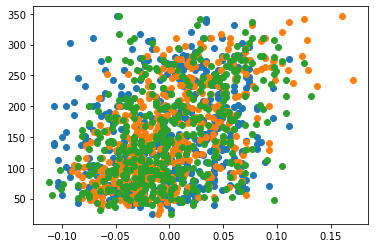

In [6]:
plt.plot(X_age,Y,'o');
plt.plot(X_bmi,Y,'o');
plt.plot(X_p,Y,'o');

age: 304.1830745282944 152.13348416289605
bmi: 949.4352603839492 152.13348416289668
p: 714.741643704287 152.13348416289585


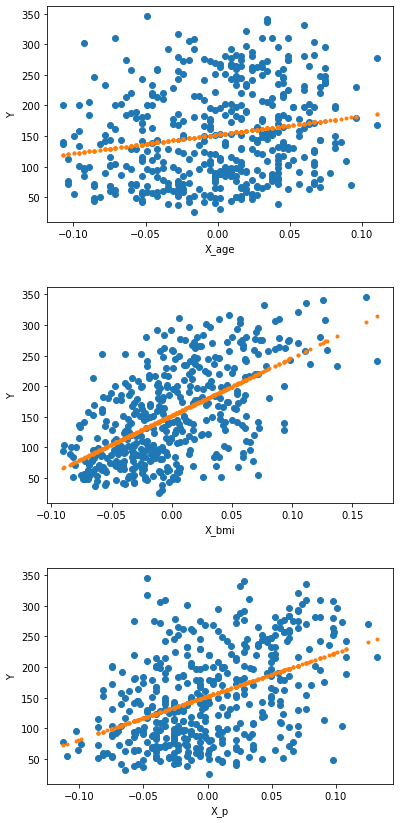

In [7]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
xdata = X_age
ydata = Y

N=len(xdata)
X_=sum(xdata)/N
Y_=sum(ydata)/N
X2_=sum([i**2 for i in xdata])/N
XY_=sum(xdata*ydata)/N

a2,b2=(XY_-X_*Y_)/(X2_-X_*X_),(X2_*Y_-X_*XY_)/(X2_-X_*X_)
print('age:',a2,b2)

plt.plot(X_age,Y,'o');
y=a2*xdata+b2
plt.plot(xdata,y,'.');
plt.xlabel("X_age")
plt.ylabel("Y")

plt.subplot(3,1,2)
xdata = X_bmi
ydata = Y

N=len(xdata)
X_=sum(xdata)/N
Y_=sum(ydata)/N
X2_=sum([i**2 for i in xdata])/N
XY_=sum(xdata*ydata)/N

a2,b2=(XY_-X_*Y_)/(X2_-X_*X_),(X2_*Y_-X_*XY_)/(X2_-X_*X_)
print('bmi:',a2,b2)

plt.plot(X_bmi,Y,'o');
y=a2*xdata+b2
plt.plot(xdata,y,'.');
plt.xlabel("X_bmi")
plt.ylabel("Y")

plt.subplot(3,1,3)
xdata = X_p
ydata = Y

N=len(xdata)
X_=sum(xdata)/N
Y_=sum(ydata)/N
X2_=sum([i**2 for i in xdata])/N
XY_=sum(xdata*ydata)/N

a2,b2=(XY_-X_*Y_)/(X2_-X_*X_),(X2_*Y_-X_*XY_)/(X2_-X_*X_)
print('p:',a2,b2)

plt.plot(X_p,Y,'o');
y=a2*xdata+b2
plt.plot(xdata,y,'.');
plt.xlabel("X_p")
plt.ylabel("Y")

plt.subplots_adjust(left=0.6, bottom=0, right=1, top=0.9, wspace=0.5, hspace=0.3)

age, bmi, p가 증가하면 당노병 진행 정도도 증가한다. 평균일 때 당노명 진행 정도는 152.13348416289585로 동일하다. bmi > p > age 순으로 당노병 진행 정도에 영향을 준다.

In [8]:
def err(xdata,ydata,a,b):
    x2 = xdata
    y2 = a*x2+b
    error=sum(((ydata-y2)**2))/len(xdata)
    return(error)

age: 304.18000000000006 152.14000000000004
bmi: 949.4399999999998 152.14000000000004
p: 714.7400000000002 152.14000000000004


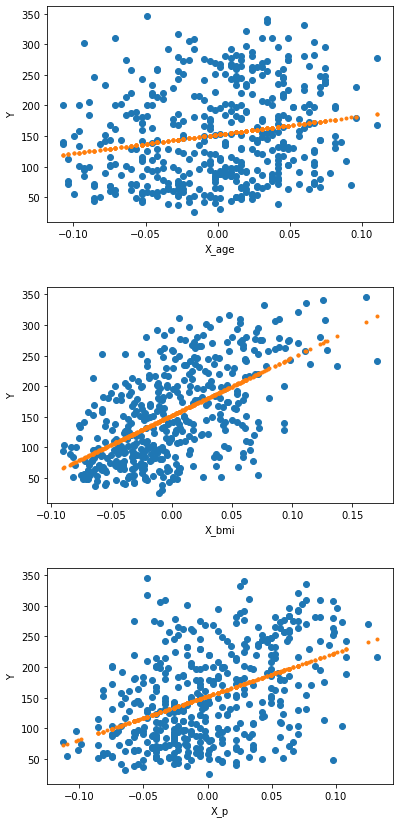

In [9]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
xdata = X_age
ydata = Y
a=0;b=0;eps=1
n=0;
while(n<10000):
    if err(xdata,ydata,a+eps,b)>err(xdata,ydata,a-eps,b):
        a=a-eps
    else:
        a=a+eps
    if err(xdata,ydata,a,b+eps)>err(xdata,ydata,a,b-eps):
        b=b-eps
    else:
        b=b+eps
    n=n+1
    
eps=0.1    
n=0;
while(n<10000):
    if err(xdata,ydata,a+eps,b)>err(xdata,ydata,a-eps,b):
        a=a-eps
    else:
        a=a+eps
    if err(xdata,ydata,a,b+eps)>err(xdata,ydata,a,b-eps):
        b=b-eps
    else:
        b=b+eps
    n=n+1
    
eps=0.01    
n=0;
while(n<10000):
    if err(xdata,ydata,a+eps,b)>err(xdata,ydata,a-eps,b):
        a=a-eps
    else:
        a=a+eps
    if err(xdata,ydata,a,b+eps)>err(xdata,ydata,a,b-eps):
        b=b-eps
    else:
        b=b+eps
    n=n+1 
    
print('age:',a,b)

plt.plot(X_age,Y,'o');
y=a*xdata+b
plt.plot(xdata,y,'.');
plt.xlabel("X_age")
plt.ylabel("Y")

plt.subplot(3,1,2)
xdata = X_bmi
ydata = Y
a=0;b=0;eps=1
n=0;
while(n<10000):
    if err(xdata,ydata,a+eps,b)>err(xdata,ydata,a-eps,b):
        a=a-eps
    else:
        a=a+eps
    if err(xdata,ydata,a,b+eps)>err(xdata,ydata,a,b-eps):
        b=b-eps
    else:
        b=b+eps
    n=n+1
    
eps=0.1    
n=0;
while(n<10000):
    if err(xdata,ydata,a+eps,b)>err(xdata,ydata,a-eps,b):
        a=a-eps
    else:
        a=a+eps
    if err(xdata,ydata,a,b+eps)>err(xdata,ydata,a,b-eps):
        b=b-eps
    else:
        b=b+eps
    n=n+1
    
eps=0.01    
n=0;
while(n<10000):
    if err(xdata,ydata,a+eps,b)>err(xdata,ydata,a-eps,b):
        a=a-eps
    else:
        a=a+eps
    if err(xdata,ydata,a,b+eps)>err(xdata,ydata,a,b-eps):
        b=b-eps
    else:
        b=b+eps
    n=n+1 
print('bmi:',a,b)

plt.plot(X_bmi,Y,'o');
y=a*xdata+b
plt.plot(xdata,y,'.');
plt.xlabel("X_bmi")
plt.ylabel("Y")

plt.subplot(3,1,3)
xdata = X_p
ydata = Y
a=0;b=0;eps=1
n=0;
while(n<10000):
    if err(xdata,ydata,a+eps,b)>err(xdata,ydata,a-eps,b):
        a=a-eps
    else:
        a=a+eps
    if err(xdata,ydata,a,b+eps)>err(xdata,ydata,a,b-eps):
        b=b-eps
    else:
        b=b+eps
    n=n+1
    
eps=0.1    
n=0;
while(n<10000):
    if err(xdata,ydata,a+eps,b)>err(xdata,ydata,a-eps,b):
        a=a-eps
    else:
        a=a+eps
    if err(xdata,ydata,a,b+eps)>err(xdata,ydata,a,b-eps):
        b=b-eps
    else:
        b=b+eps
    n=n+1
    
eps=0.01    
n=0;
while(n<10000):
    if err(xdata,ydata,a+eps,b)>err(xdata,ydata,a-eps,b):
        a=a-eps
    else:
        a=a+eps
    if err(xdata,ydata,a,b+eps)>err(xdata,ydata,a,b-eps):
        b=b-eps
    else:
        b=b+eps
    n=n+1 
print('p:',a,b)

plt.plot(X_p,Y,'o');
y=a*xdata+b
plt.plot(xdata,y,'.');
plt.xlabel("X_p")
plt.ylabel("Y")

plt.subplots_adjust(left=0.6, bottom=0, right=1, top=0.9, wspace=0.5, hspace=0.3)

최소제곱법으로 구한 기울기, 절편값과 매우 근접한 기울기, 절편값을 구했다.

In [10]:
a=0;b=0;eps=1
xdata = X_age
ydata = Y
for i in range(1,3):
    eps=1*10**(-i)
    n=0
    while(n<10000):
        if err(xdata,ydata,a+eps,b)>err(xdata,ydata,a-eps,b):
            a=a-eps
        else:
            a=a+eps
        if err(xdata,ydata,a,b+eps)>err(xdata,ydata,a,b-eps):
            b=b-eps
        else:
            b=b+eps
        n=n+1
print('age:',a,b)

a=0;b=0;eps=1
for i in range(1,10):
    eps=1*10**(-i)
    n=0
    while(n<10000):
        if err(xdata,ydata,a+eps,b)>err(xdata,ydata,a-eps,b):
            a=a-eps
        else:
            a=a+eps
        if err(xdata,ydata,a,b+eps)>err(xdata,ydata,a,b-eps):
            b=b-eps
        else:
            b=b+eps
        n=n+1
print('age:',a,b)

age: 304.1800000000007 152.1399999999957
age: 304.18310200200057 152.1334819979957


eps를 더 작게 하면 더 정확한 기울기와 절편값을 구할 수 있다.

2. sklearn을 이용해서

In [11]:
from sklearn import datasets
diabetes=datasets.load_diabetes()
diabetes.keys()
diabetes.DESCR
X_age=diabetes.data[:,0] # 나이
X_bmi=diabetes.data[:,2] # BMI
X_p=diabetes.data[:,3] # 혈압
Y = diabetes.target

In [12]:
X_age=[[i] for i in X_age]
X_bmi=[[i] for i in X_bmi]
X_p=[[i] for i in X_p]

In [13]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly2_age = poly_features.fit_transform(X_age)
X_poly2_bmi = poly_features.fit_transform(X_bmi)
X_poly2_p = poly_features.fit_transform(X_p)

In [14]:
from sklearn.linear_model import LinearRegression
reg2_age=LinearRegression() 
reg2_age.fit(X_poly2_age,Y)
print('age:',reg2_age.intercept_, reg2_age.coef_)

reg2_bmi=LinearRegression() 
reg2_bmi.fit(X_poly2_bmi,Y)
print('bmi:',reg2_bmi.intercept_, reg2_bmi.coef_)

reg2_p=LinearRegression() 
reg2_p.fit(X_poly2_p,Y)
print('p:',reg2_p.intercept_, reg2_p.coef_)

age: 150.41970168545706 [312.49148174 757.49185503]
bmi: 151.47217830803362 [941.14735549 292.29718785]
p: 148.494209478361 [ 692.5780979  1608.55941056]


In [15]:
reg1_age=LinearRegression()
reg1_age.fit(X_age,Y)
print('age:',reg1_age.coef_, reg1_age.intercept_)

reg1_bmi=LinearRegression()
reg1_bmi.fit(X_bmi,Y)
print('bmi:',reg1_bmi.coef_, reg1_bmi.intercept_)

reg1_p=LinearRegression()
reg1_p.fit(X_p,Y)
print('p:',reg1_p.coef_, reg1_p.intercept_)

age: [304.18307453] 152.13348416289605
bmi: [949.43526038] 152.1334841628967
p: [714.7416437] 152.13348416289585


sklearn을 이용하지 않고 회귀분석을 했을 때 데이터가 선형 관계를 가지고 있다고 가정하고 최소제곱법을 이용해서 구한 기울기와 절편값은 sklearn에서 PolynomialFeatures를 하지 않은 기울기, 절편값과 동일하다.

In [7]:
poly_features = PolynomialFeatures(degree=40, include_bias=False)
X_poly40_age = poly_features.fit_transform(X_age)
reg40_age=LinearRegression() 
reg40_age.fit(X_poly40_age,Y)

poly_features = PolynomialFeatures(degree=40, include_bias=False)
X_poly40_bmi = poly_features.fit_transform(X_bmi)
reg40_bmi=LinearRegression() 
reg40_bmi.fit(X_poly40_bmi,Y)

poly_features = PolynomialFeatures(degree=40, include_bias=False)
X_poly40_p = poly_features.fit_transform(X_p)
reg40_p=LinearRegression() 
reg40_p.fit(X_poly40_p,Y)

LinearRegression()

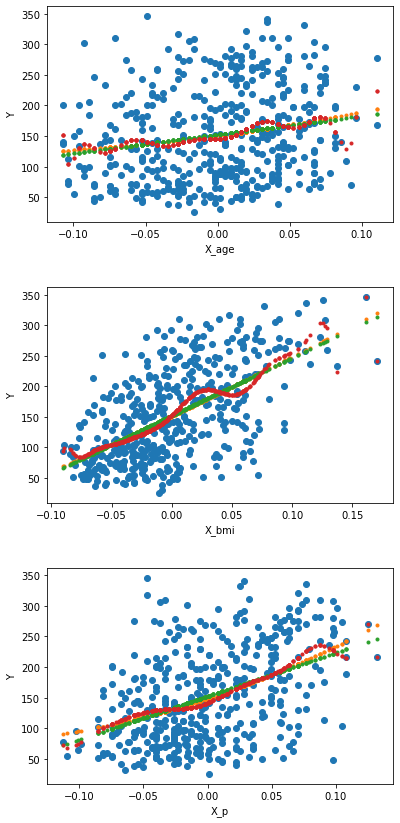

In [8]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
plt.plot(X_age,Y,'o');
plt.plot(X_poly2_age[:,0],reg2_age.predict(X_poly2_age),'.')
plt.plot(X_age,reg1_age.predict(X_age),'.')
plt.plot(X_poly40_age[:,0],reg40_age.predict(X_poly40_age),'.')
plt.xlabel("X_age")
plt.ylabel("Y")

plt.subplot(3,1,2)
plt.plot(X_bmi,Y,'o');
plt.plot(X_poly2_bmi[:,0],reg2_bmi.predict(X_poly2_bmi),'.')
plt.plot(X_bmi,reg1_bmi.predict(X_bmi),'.')
plt.plot(X_poly40_bmi[:,0],reg40_bmi.predict(X_poly40_bmi),'.')
plt.xlabel("X_bmi")
plt.ylabel("Y")

plt.subplot(3,1,3)
plt.plot(X_p,Y,'o');
plt.plot(X_poly2_p[:,0],reg2_p.predict(X_poly2_p),'.')
plt.plot(X_p,reg1_p.predict(X_p),'.')
plt.plot(X_poly40_p[:,0],reg40_p.predict(X_poly40_p),'.')
plt.xlabel("X_p")
plt.ylabel("Y")

plt.subplots_adjust(left=0.6, bottom=0, right=1, top=0.9, wspace=0.5, hspace=0.3)

PolynomialFeatures에서 degree=2로 한 것은 PolynomialFeatures를 이용하지 않은 것과 비슷하지만 차이가 있다. PolynomialFeatures에서 degree=40으로 하면 over fitting이 일어난다.

In [9]:
from sklearn.linear_model import Lasso

lasso_reg_age = Lasso(alpha=0.01)
lasso_reg_age.fit(X_poly40_age,Y)

lasso_reg_bmi = Lasso(alpha=0.01)
lasso_reg_bmi.fit(X_poly40_bmi,Y)

lasso_reg_p = Lasso(alpha=0.01)
lasso_reg_p.fit(X_poly40_p,Y)

Lasso(alpha=0.01)

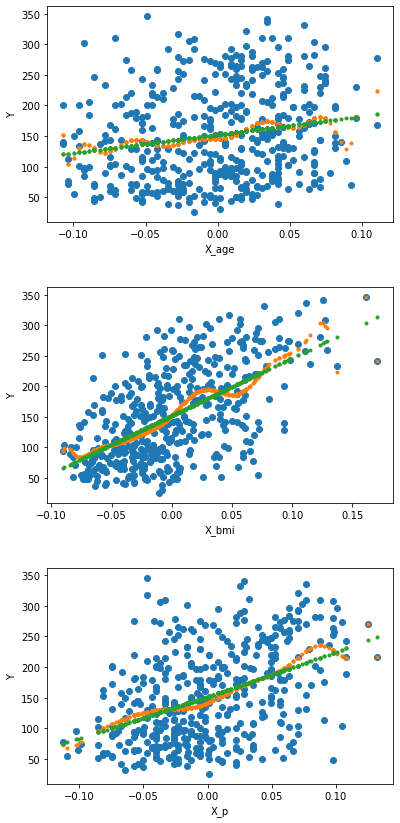

In [10]:
plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
plt.plot(X_age,Y,'o');
plt.plot(X_poly40_age[:,0],reg40_age.predict(X_poly40_age),'.')
plt.plot(X_poly40_age[:,0],lasso_reg_age.predict(X_poly40_age),'.')
plt.xlabel("X_age")
plt.ylabel("Y")

plt.subplot(3,1,2)
plt.plot(X_bmi,Y,'o');
plt.plot(X_poly40_bmi[:,0],reg40_bmi.predict(X_poly40_bmi),'.')
plt.plot(X_poly40_bmi[:,0],lasso_reg_bmi.predict(X_poly40_bmi),'.')
plt.xlabel("X_bmi")
plt.ylabel("Y")

plt.subplot(3,1,3)
plt.plot(X_p,Y,'o');
plt.plot(X_poly40_p[:,0],reg40_p.predict(X_poly40_p),'.')
plt.plot(X_poly40_p[:,0],lasso_reg_p.predict(X_poly40_p),'.')
plt.xlabel("X_p")
plt.ylabel("Y")

plt.subplots_adjust(left=0.6, bottom=0, right=1, top=0.9, wspace=0.5, hspace=0.3)

Lasso Regression는 MSE에 제곱이 아닌 절대값을 페널티로 준다.

Lasso Regression를 이용하면 over fitting을 피할 수 있다.

PolynomialFeatures에서 degree=40으로 했는것이 Lasso Regression을 통하면서 PolynomialFeatures를 하지 않은 것과 같아졌다.